In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [7]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [8]:
df['Sales'] = df['Sales'].astype(int)
  

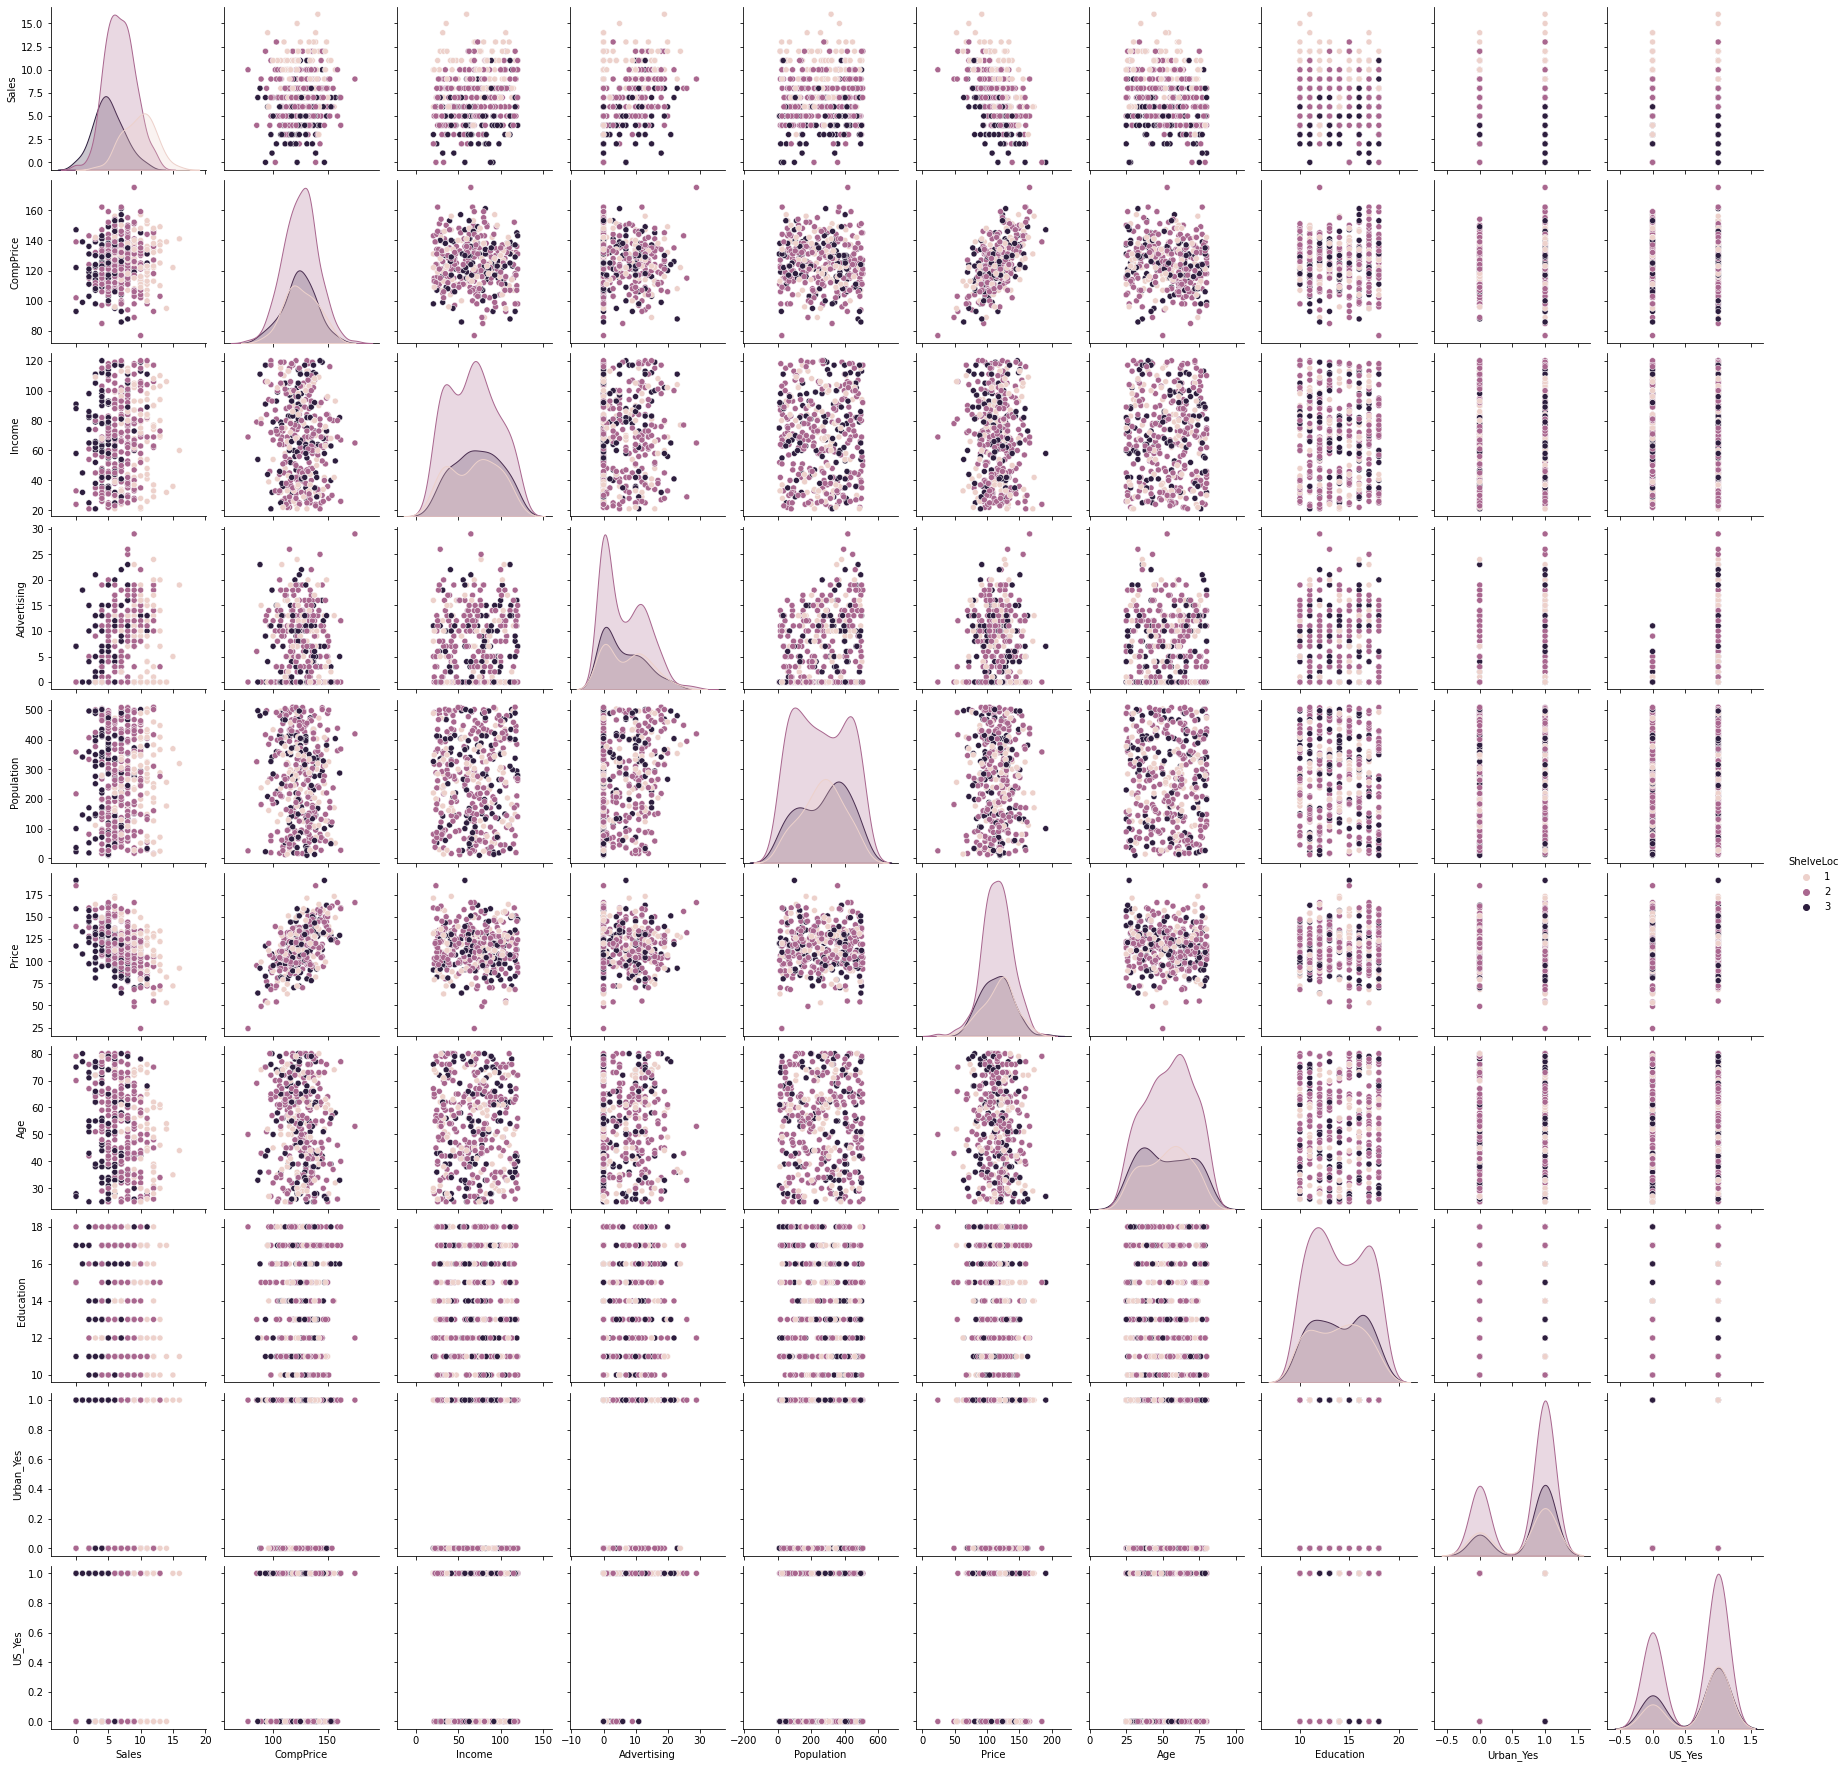

In [9]:
sns.pairplot(data=df, hue = 'ShelveLoc')

In [22]:
x=df.iloc[:,1:10]
y=df['Sales']

In [23]:
#split data for train and test

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9,138,73,11,276,120,3,42,17,1,1
1,11,111,48,16,260,83,1,65,10,1,1
2,10,113,35,10,269,80,2,59,12,1,1
3,7,117,100,4,466,97,2,55,14,1,1
4,4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,1,33,14,1,1
396,6,139,23,3,37,120,2,55,11,0,1
397,7,162,26,12,368,159,2,40,18,1,1
398,5,100,79,7,284,95,3,50,12,1,1


# Building Decision Tree Classifier using Entropy Criteria

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='random')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
pd.Series(ypred).value_counts()

6     38
4     15
10    12
8      7
5      5
11     3
dtype: int64

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.13      0.22      0.17         9
           5       0.20      0.11      0.14         9
           6       0.11      0.40      0.17        10
           7       0.00      0.00      0.00        11
           8       0.14      0.07      0.10        14
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         1
          11       0.33      0.25      0.29         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1

    accuracy                           0.11        80
   macro avg       0.07      0.08      0.06        80
weighted avg       0.09      0.11      0.09        80



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


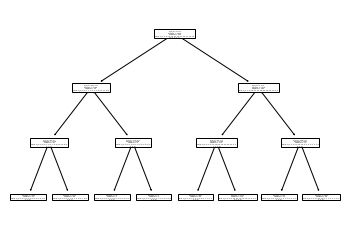

In [29]:
#PLot the decision tree
tree.plot_tree(dt);

In [30]:
np.mean(ypred==ytest)

0.1125

# Building Decision Tree Classifier (CART) using Gini Criteria

In [31]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='random')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)


In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.20      0.33      0.25         3
           4       0.20      0.11      0.14         9
           5       0.04      0.11      0.06         9
           6       0.06      0.10      0.07        10
           7       0.29      0.18      0.22        11
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         1
          11       0.33      0.25      0.29         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1

    accuracy                           0.09        80
   macro avg       0.08      0.08      0.07        80
weighted avg       0.10      0.09      0.09        80



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
np.mean(ypred==ytest)

0.0875